# Logistic Regression for Digit and Fashion Classfication

This code explores the use of **logistic regression** for classifying digits in the classic MNIST handwritten digit dataset. It is not too difficult to achieve near perfect classification performance on this dataset, therefore noise is added to the images to make the classification task less trivial. We also explore the Fashion-MNIST dataset which is much more challenging for machine learning models to learn.

We will explore the effect of a number of hyperparameters that affect the performance of the model/classifier, interpret the coefficients of the optimal model, and analyze some of the mistakes the model makes in its predictions to determine if there are patterns to the images that give it trouble. Finally, we will use this information to add features to the model to improve its performance.



# Import libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn.linear_model
import sklearn.metrics
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as sp
%matplotlib inline
plt.style.use('seaborn') # pretty matplotlib plots

from warnings import filterwarnings
filterwarnings('ignore')

!git clone https://github.com/martin-buck/Logistic-regression-for-digit-and-fashion-classification

Cloning into 'Logistic-regression-for-digit-and-fashion-classification'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 18 (delta 4), reused 11 (delta 2), pack-reused 0
Unpacking objects: 100% (18/18), done.
Checking out files: 100% (9/9), done.


## Import data

First load the data and take a look at its format in a Pandas dataframe.

In [2]:
x_train = np.loadtxt('/content/Logistic-regression-for-digit-and-fashion-classification/MNIST/x_train.csv', delimiter=',', skiprows=1)
x_test = np.loadtxt('/content/Logistic-regression-for-digit-and-fashion-classification/MNIST/x_test.csv', delimiter=',', skiprows=1)
y_train = np.loadtxt('/content/Logistic-regression-for-digit-and-fashion-classification/MNIST/y_train.csv', delimiter=',', skiprows=1)
y_test = np.loadtxt('/content/Logistic-regression-for-digit-and-fashion-classification/MNIST/y_test.csv', delimiter=',', skiprows=1)

Each row of the 'x_' arrays consists of pixel data from a different 28-by-28 image with gray-scale values between 0 and 1. Each column is a feature corresponding to a pixel location in the image, each row is a separate image. There are 784 columns and 11,800 rows.

Typically, we would want to **normalize** or **scale** the data using sklearn *MinMaxScaler* or *StandardScaler*. These are grayscale images that are already normalized so the pixel values are between 0 and 1, so there is no need to apply these transforms to the dataset.

In [3]:
pd.DataFrame(data = x_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.576,0.988,0.165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000,0.000,0.000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11795,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.000,0.000,0.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
11796,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
11797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Each row of the 'y_' arrays consist of a label '0' or '1' corresponding to a handwritten digit of '8' or '9' respectively.

In [ ]:
pd.DataFrame(data = y_train)

,0
0,1.0
1,0.0
2,1.0
3,1.0
4,0.0
...,...
11795,0.0
11796,1.0
11797,1.0
11798,0.0


## Logistic Regression and $\textit{max_iter}$

The input to this model is the x_train dataframe above. That is, the features or covariates are the 784 greyscale pixel values corresponding to the pixels in each of the 28-by-28 images in the training data. The output is a probability that the image is a '9' rather than an '8'.

One of the arguments when initializing a logistic regression in sklearn is $\textit{max_iter}$, which limits the number of iterations in the iterative optimization routine (e.g. gradient descent) used to minimize the logistic loss function and identify optimal model parameters. Here, we explore what happens to model performance as $\textit{max_iter}$ is changed from its default value. On a related note, limiting the number of iterations on training data is a method of regularization called **early stopping** where model training is ended when performance on the test or validation data set starts to increase. We will measure performance with **accuracy** and the **logistic loss**. As a reminder, logistic loss is the loss function used in logistic regression defined as: $\sum_{(x,y)\in D} -y_{true}log(y_{pred})+(1-y_{true})log(1-y_{pred})$. For example, we can see that the logistic loss will be large if there are many data points where $y_{true}=1$ but $y_{pred} \approx 0$. Thus, minimizing this quantity will ensure this kind of missclassification is rare. Later we will explore performance on the test data set.

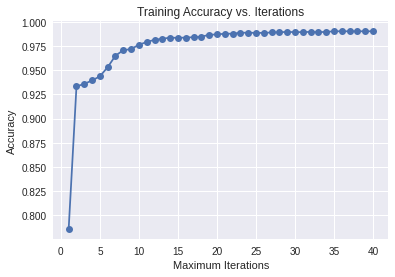

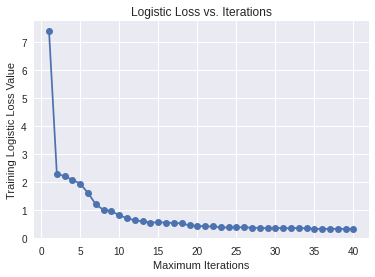

In [ ]:
accuracy = []
logloss = []
models = []
max_iter = range(1, 41)

for i in max_iter:
    logistic = sklearn.linear_model.LogisticRegression(max_iter=i)
    logistic.fit(x_train, y_train)
    models.append(logistic)
    probs_train = logistic.predict(x_train)
    accuracy.append(logistic.score(x_train, y_train))
    logloss.append(sklearn.metrics.log_loss(y_train, probs_train))
    
plt.figure()
plt.plot(max_iter, accuracy, marker='o')
plt.xlabel('Maximum Iterations')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs. Iterations');
plt.figure()
plt.plot(max_iter, logloss, marker='o')
plt.xlabel('Maximum Iterations')
plt.ylabel('Training Logistic Loss Value')
plt.title('Logistic Loss vs. Iterations');

We can see that both accuracy and logistic loss improve monotonically as $\textit{max_iter}$ increases. This makes sense: we are handicapping the model by limiting how long it can explore parameter space to minimize the loss function. We cannot expect the model to minimize the loss function and converge to an optimal solution after only one or two iterations. In the optimization routine, the initial parameter values are set to zero - an unlikely optimal set of parameters. As we allow larger values of $\textit{max_iter}$, the optimization routine has more time to converge and get closer to the minimum of the loss function. Furthermore, the model converges quickly: after approximately twenty iterations the accuracy and logistic loss curve level off.

## Pixel Weights in the Logistic Regression Model

Below is a plot of the weights given to each of the pixels (our features) in the optimal logistic regression model for each value of $\textit{max_iter}$. We interpret these weights as the importance of the pixel in determining whether the image is an '8' or a '9'. For example, a positive weight would indicate that when the pixel is lit up the image is slightly more likely to be a '9'. Conversely, a negative weight would indicate that when the pixel is lit up the image is slightly more likely to be a '8'.

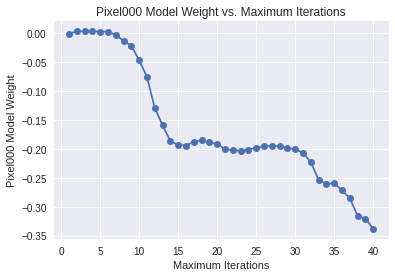

In [ ]:
model_coeff_arr = []

for i in max_iter:
    model_coeffs = models[i-1].coef_[0]
    pixel000_coeff = model_coeffs[0]
    model_coeff_arr.append(pixel000_coeff)

plt.figure()
plt.plot(max_iter, model_coeff_arr, marker='o')
plt.xlabel('Maximum Iterations')
plt.ylabel('Pixel000 Model Weight')
plt.title('Pixel000 Model Weight vs. Maximum Iterations');

We can see that the weight for this pixel increases in magnitude as the model is allowed to run longer in iterations and get closer to an optimal model. This happens more-or-less monotonically as the maximum iterations increases. Since the weight is becoming more negative, we can conlude that lighter values of this pixel downweight the probability of the image belonging to the postive class i.e. being a '9'. This makes sense: this pixel is in the center of the image, and is often at the center of an '8' in many of the images.

## Regularization Penalties

We now explore different values of the $l_2$-regularization parameter. Recall that $l_2$-regularization, also called **ridge regression**, adds the term $||w||_2$ to the objective that will be minimized. This has the effect of punishing large weights and guides the minimization process to a model that does not overfit or over-emphasize certain features. This is done on a log-scale to capture a large range of model performance. For each value of the regularization parameter a model is fit to the training data, predictions are made on the test data, and the logistic loss and accuracy are calculated. Note that in sklearn, the 'C' parameter for regularization is an inverse regularization penalty.

In [ ]:
C_grid = np.logspace(-9,6,31)
logloss_test, logloss_train = [], []
accuracy_test, accuracy_train = [], []
models = []

# iterate over a range of regularization strengths/penalties
for penalty in C_grid:
    logistic = sklearn.linear_model.LogisticRegression(C=penalty)
    logistic.fit(x_train, y_train)
    probs_test, probs_train = logistic.predict(x_test), logistic.predict(x_train)
    logloss_test.append(sklearn.metrics.log_loss(y_test, probs_test))
    logloss_train.append(sklearn.metrics.log_loss(y_train, probs_train))
    accuracy_test.append(logistic.score(x_test, y_test))
    accuracy_train.append(logistic.score(x_train, y_train))
    models.append(logistic)

optimal_C = C_grid[np.argmin(logloss_test)]
optimal_model = models[np.argmin(logloss_test)]
optimal_accuracy = accuracy[np.argmin(logloss_test)]
optimal_logloss = np.min(logloss_test)
optimal_predictions_test = optimal_model.predict(x_test) >= .5
optimal_predictions_train = optimal_model.predict(x_train) >= .5

print('The optimal value of the regularization penalty "C" that minimizes logistic loss on the test dataset is ' + str(optimal_C) + '\n')
print('The logistic loss of the optimal model is ' + str(round(optimal_logloss, 2)) + '\n')
print('The accuracy of the optimal model is ' + str(round(optimal_accuracy*100, 2)) + '%')

The optimal value of the regularization penalty "C" that minimizes logistic loss on the test dataset is 0.1

The logistic loss of the optimal model is 1.15

The accuracy of the optimal model is 98.42%


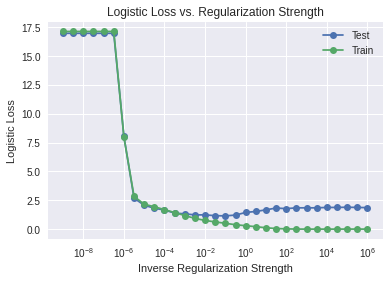

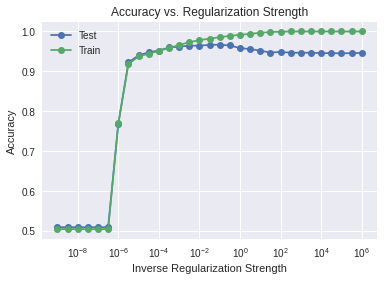

In [ ]:
# plot logistic loss vs. regularization strength
plt.figure()
plt.plot(C_grid, logloss_test, marker='o')
plt.plot(C_grid, logloss_train, marker='o')
plt.legend(['Test', 'Train'])
plt.xscale('log')
plt.xlabel('Inverse Regularization Strength')
plt.ylabel('Logistic Loss')
plt.title('Logistic Loss vs. Regularization Strength');

# now plot accuracy vs. regularization strength
plt.figure()
plt.plot(C_grid, accuracy_test, marker='o')
plt.plot(C_grid, accuracy_train, marker='o')
plt.legend(['Test', 'Train'])
plt.xscale('log')
plt.xlabel('Inverse Regularization Strength')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Regularization Strength');

The optimal value of regularization that minimizes logistic loss in the test data set is $C=\frac{1}{10}$. The minimum logistic loss and the accuracy corresponding to this minimum is approximately 1.15 and 98.4% respectively. The confusion matrix indicates that there are 32 false positives and 34 false negatives predicted by the model on the test data. The accuracy is very high, but accuracy can be misleading in some cases. The dataset is not heavily weighted towards '8' or '9' so there is no reason a priori to believe that accuracy is misleading. 

We can also compute other measures of performance such as **recall**, **specificity**, **precision**, **negative predictive value**, and create a **ROC curve**. Recall is how often the positive examples are labeled correcly, $P(C=1|T=1)$, where $C=1$ indicates the classifier label and $T=1$ is the true label. Specificity is how often the negative examples are labeled correctly, $P(C=0|T=0)$. Precision is how often examples labeled positive actually are positive, $P(T=1|C=1)$. And negative predictive value is how often examples laveled negative are actually negative, $P(T=0|C=0)$. 

Create a **confusion matrix** to calculate these performance measures and plot the ROC curve.

In [ ]:
cm = sklearn.metrics.confusion_matrix(y_test, optimal_predictions_test)
cm_df = pd.DataFrame(cm, columns=[0,1], index=[0,1])
cm_df.columns.name = 'Predicted'
cm_df.index.name = 'Truth'
print(cm_df)

Predicted    0    1
Truth              
0          942   32
1           34  975


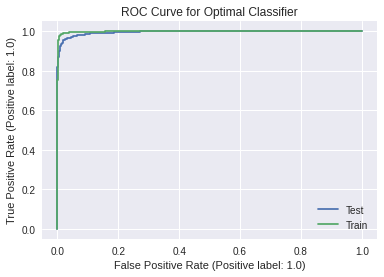

In [ ]:
fig = sklearn.metrics.plot_roc_curve(optimal_model, x_test, y_test)
sklearn.metrics.plot_roc_curve(optimal_model, x_train, y_train, ax=fig.ax_)
plt.title('ROC Curve for Optimal Classifier')
plt.legend(['Test', 'Train'])
plt.show()

The recall, specificity, precision, and negative predictive value are: 96.6%, 96.7%, 96.8%, 96.5% respectively. The AUC value of .99 for the corresponding ROC curve is further evidence that this is a good classifier regardless of our tolerance for false positives.

## Investigating False Positives and False Negatives

The logistic regression model is very good but not perfect as a classifier to identify the handwritten digits. Below are some of the mistakes that this classifier makes.

In [ ]:
def display_misclass(images, truth, predictions):
    
    # display nine false positives and nine false negatives to see where the classifier is having trouble
    false_pos = np.logical_and(truth == 0, predictions == 1)
    false_neg = np.logical_and(truth == 1, predictions == 0)
    true_pos = np.logical_and(truth == 1, predictions == 1)
    true_neg = np.logical_and(truth == 0, predictions == 0)

    false_pos_eg = images[false_pos, :]
    false_neg_eg = images[false_neg, :]
    true_pos_eg = images[true_pos, :]
    true_neg_eg = images[true_neg, :]
    
    classes = [false_pos_eg, false_neg_eg, true_pos_eg, true_neg_eg]
    titles = ['False positives', 'False negatives', 'True positives', 'True negatives']
    
    for t, c in enumerate(classes):
        plt.figure()
        counter = 1
        for i in range(3):
            for j in range(3):
                plt.subplot(3, 3, counter) 
                plt.imshow(np.reshape(c[counter], (28,28)), cmap='gray', vmin=0, vmax=1)
                counter += 1
        plt.suptitle(titles[t])

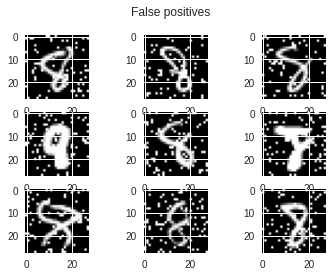

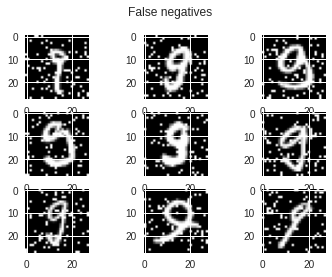

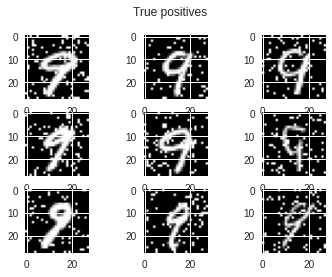

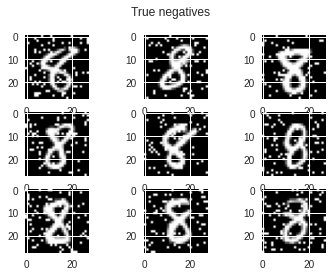

In [ ]:
display_misclass(x_test, y_test, optimal_predictions_test)

The classifier understandably has trouble with images of digits that are atypical and "poorly written". For example, in the false positive class i.e. those images the model believes are '9' but are in fact '8', two patterns emerge: 1) 8's that do not have two closed loops and 2) 8's that have essentially one closed loop. In the false negative class i.e. those images the model believes are '8' but are in fact '9', one pattern emerges: The '9' images are drawn with a curve below the top loop rather than a straight line below the top loop. Interestingly, the noise in one of the false negative images happens to create a loop (bottom right corner) so that there are a total of two loops in the image, like an 8. These patterns do not characterize all of the false positives and false negatives, but there are enough images here with those patterns to lend credence to these being real features of the handwriting that gives the model trouble.

## Color Map of Model Weights

We now analyze all the weights produced by optimal model. A heat map is created to visualize which weights the model believes are important when deciding if a given image is an ‘8’ or a ‘9’.

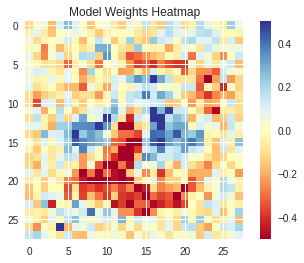

In [ ]:
optimal_weights = np.reshape(optimal_model.coef_, (28,28))
plt.imshow(optimal_weights, cmap='RdYlBu', vmin=-.5, vmax=.5)
plt.colorbar()
plt.title('Model Weights Heatmap');

The two red regions in the above image are pixels that when lit up indicate to the model that an '8' is in the image. These correspond to the top of the top loop and the bottom of the bottom loop in an '8'. The blue region in the middle of the heatmap are pixels that when lit up indicate to the model that a '9' is in the image. This corresponds to the top loop of a '9'. We can now see why some of the above misclassifications occur: a '9' that is written "curvy" below the top loop (rather than a straight line below the top loop) would intersect with the red region in the above heatmap, pushing their classification probability towards an ‘8’.


# Shirt Classification

The goal of this section is to get a sense of the performance of the logistic classifier on the images of t-shirts and other clothing items (from the [Fashion-MNIST dataset ](https://github.com/zalandoresearch/fashion-mnist)) and explore **feature engineering**. To start this process, **k-fold cross-validation** is performed on a range of regularization strengths in a **lasso regression**. Lasso regression uses an $l_1$ penalty $||w||_1$ to regularize rather than the $l_2$ penalty $||w||_2$ used in ridge regression and is useful as a tool for feature selection by zeroing out irrelevant features. It is reasonable that the value of some pixels (such as those in the corners) should be irrelevant to the classification – most of the image and difference in shapes occur closer to the center. The performance of the best model will serve as a baseline to beat while exploring additional features to add to the model. The model with a $l_1$ penalty performs slightly better than with a $l_2$ penalty, as seen below by adjusting the 'penalty' argument in the 'regularization_kfolds' function.

Note that state-of-the-art models achieve test accuracy in the low 90's, whereas it isn't uncommon to achieve close to perfect performance on the MNIST digits dataset.

First load the data and take a look at its format in a Pandas dataframe.


In [4]:
x_train = np.loadtxt('/content/Logistic-regression-for-digit-and-fashion-classification/FashionMNIST/train_shirt_x.csv', delimiter=',', skiprows=1)
y_train = np.loadtxt('/content/Logistic-regression-for-digit-and-fashion-classification/MNIST/y_train.csv', delimiter=',', skiprows=1)
x_test = np.loadtxt('/content/Logistic-regression-for-digit-and-fashion-classification/MNIST/x_test.csv', delimiter=',', skiprows=1)

Each row of the 'x_' arrays consists of pixel data from a different 28-by-28 image with gray-scale values between 0 and 1. Each column is a feature corresponding to a pixel location in the image, each row is a separate image. There are 784 columns and 12,000 rows.

In [5]:
pd.DataFrame(data=x_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0041,0.0000,0.0000,0.0000,0.1020,0.7176,0.3961,0.5176,0.2667,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0039,0.0000,0.0000,0.1412,0.3451,...,0.3608,0.2549,0.5529,0.7529,0.0235,0.0000,0.0078,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0039,0.0000,0.0000,0.2585,0.3608,0.3595,0.3608,0.5490,0.4920,0.4235,0.4071,0.3480,0.3320,0.0000,0.0000,0.004,0.0000,0.0000,0.0000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0106,0.0046,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0145,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0039,0.0039,0.0000,0.0000,0.0000,0.2784,0.5608,0.7922,...,0.8235,0.8235,0.7255,0.7373,0.6275,0.0000,0.0000,0.0039,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0128,0.0000,0.2591,0.4000,0.3252,0.3441,0.3333,0.3333,0.3255,0.3255,0.3347,0.3293,0.3098,0.3589,0.3577,0.0000,0.000,0.0000,0.0000,0.0000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0157,0.0431,0.1490,0.5843,0.4510,0.4691,0.7833,0.4251,0.0000,0.0207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0039,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.1667,0.4235,0.2780,0.2692,0.2588,0.2591,0.1922,0.2358,0.2308,0.1412,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0000,0.0043,0.0000,0.0000,0.0041,0.0042,0.0000,0.0000,0.4275,0.7922,0.7137,0.8314,0.2078,0.0000,0.0132,0.0084,0.0041,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0039,0.0039,0.0157,0.0078,0.0000,0.0000,0.0000,0.0000,...,0.8392,0.8392,0.8314,0.4549,0.0000,0.0000,0.5020,0.9098,0.7333,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.6598,0.8150,0.3569,0.0000,0.0000,0.0000,0.0805,0.2667,0.3843,0.4706,0.4431,0.4120,0.3725,0.2490,0.0080,0.0000,0.0000,0.0000,0.224,0.6392,0.5909,0.0000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0051,0.0049,0.0000,0.0000,0.0000,0.0039,0.2196,0.2549,0.2784,0.1059,0.1059,0.0745,0.1412,0.3176,0.4235,0.1961,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0275,0.3255,0.5804,0.7647,0.8549,0.5529,...,0.4392,0.4824,0.4902,0.5216,0.4824,0.4510,0.0667,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0051,0.0000,0.0000,0.1255,0.1538,0.1725,0.1789,0.2105,0.2235,0.2118,0.1804,0.1725,0.1855,0.1606,0.1569,0.1290,0.0285,0.0000,0.000,0.0045,0.0000,0.0000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.0,0.0,0.0,0.0,0.0000,0.0130,0.0000,0.0000,0.0000,0.0546,0.1020,0.5765,0.8196,0.7020,0.7373,0.7843,0.5608,0.0941,0.1009,0.0000,0.0000,0.0000,0.0102,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0039,0.0000,0.0000,0.4275,0.5647,0.7412,0.8314,0.7255,...,0.6196,0.5059,0.3569,0.1569,0.0000,0.0000,0.7608,0.7216,0.8941,0.6353,0.0,0.0,0.0,0.0,0.2408,0.3375,0.7336,0.6063,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.624,0.6902,0.3182,0.2202,0.0,0.0
11996,0.0,0.0,0.0,0.0,0.0000,0.0049,0.0053,0.0000,0.0000,0.0000,0.1490,0.5137,0.7098,0.2784,0.0706,0.0235,0.6039,0.7255,0.2157,0.0000,0.0000,0.0000,0.0000,0.0064,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0039,0.0000,0.0000,0.0000,0.2980,0.5843,0.7059,0.5373,...,0.6706,0.6588,0.6784,0.6275,0.7373,0.0627,0.0000,0.0

Each row of the 'y_' arrays consist of a label '0' or '1' corresponding to a not a t-shirt and a t-shirt respectively.

In [6]:
pd.DataFrame(data = y_train)

,0
0,1.0
1,0.0
2,1.0
3,1.0
4,0.0
...,...
11795,0.0
11796,1.0
11797,1.0
11798,0.0


Below are plots of the average logistic loss and accuracy using 5-fold cross validation across a large range of penalty values.

In [ ]:
def regularization_kfolds(x_train, y_train, penalty='l2', C_grid=np.logspace(-6,6,13)):
    avg_logloss_test, avg_accuracy_test = [], []
    avg_logloss_train, avg_accuracy_train = [], []
    
    if penalty == 'l1':
        solver = 'liblinear'
    else:
        solver = 'lbfgs'

    # perform k-fold cross-validation for different values of the penalty/regularization parameter
    kf = sklearn.model_selection.KFold()
    for c in C_grid:
        logloss_test, accuracy_test = [], []
        logloss_train, accuracy_train = [], []
        for train_ind, test_ind in kf.split(x_train):
            x_train_split, x_test_split = x_train[train_ind, :], x_train[test_ind, :]
            y_train_split, y_test_split = y_train[train_ind], y_train[test_ind]
            model = sklearn.linear_model.LogisticRegression(C=c, solver=solver, penalty=penalty)
            model.fit(x_train_split, y_train_split)
            preds_test, preds_train = model.predict(x_test_split), model.predict(x_train_split)
            logloss_test.append(sklearn.metrics.log_loss(y_test_split, preds_test))
            accuracy_test.append(model.score(x_test_split, y_test_split))
            logloss_train.append(sklearn.metrics.log_loss(y_train_split, preds_train))
            accuracy_train.append(model.score(x_train_split, y_train_split))
        avg_logloss_test.append(np.mean(logloss_test))
        avg_accuracy_test.append(np.mean(accuracy_test))
        avg_logloss_train.append(np.mean(logloss_train))
        avg_accuracy_train.append(np.mean(accuracy_train))
        print('Finished C=' + str(c) + ' loop')
    
    # plot logistic loss vs. regularization strength
    plt.figure()
    plt.plot(C_grid, avg_logloss_test, marker='o')
    plt.plot(C_grid, avg_logloss_train, marker='o')
    plt.legend(['Test', 'Train'])
    plt.xscale('log')
    plt.xlabel('Inverse Regularization Strength')
    plt.ylabel('Average 5-fold Logistic Loss')
    plt.title('5-fold Average Logistic Loss vs. Inverse Regularization Strength')

    # now plot accuracy vs. regularization strength
    plt.figure()
    plt.plot(C_grid, avg_accuracy_test, marker='o')
    plt.plot(C_grid, avg_accuracy_train, marker='o')
    plt.legend(['Test', 'Train'])
    plt.xscale('log')
    plt.xlabel('Inverse Regularization Strength')
    plt.ylabel('Average 5-fold Accuracy')
    plt.title('5-fold Average Accuracy vs. Inverse Regularization Strength')

    print('\nThe value of the regularization parameter that minimizes the average logistic loss on test folds is: ' + str(round(C_grid[np.argmin(avg_logloss_test)], 2))  + '\n')
    print('The corresponding maximum average accuracy on test folds is: ' + str(round(max(avg_accuracy_test), 2)) + '\n')
    print('The corresponding minimum average logistic loss on test folds is: ' + str(round(min(avg_logloss_test), 2)) + '\n')

Finished C=1e-06 loop
Finished C=1e-05 loop
Finished C=0.0001 loop
Finished C=0.001 loop
Finished C=0.01 loop
Finished C=0.1 loop
Finished C=1.0 loop
Finished C=10.0 loop
Finished C=100.0 loop
Finished C=1000.0 loop
Finished C=10000.0 loop
Finished C=100000.0 loop
Finished C=1000000.0 loop

The value of the regularization parameter that minimizes the average logistic loss on test folds is: 1.0

The corresponding maximum average accuracy on test folds is: 0.86

The corresponding minimum average logistic loss on test folds is: 4.85



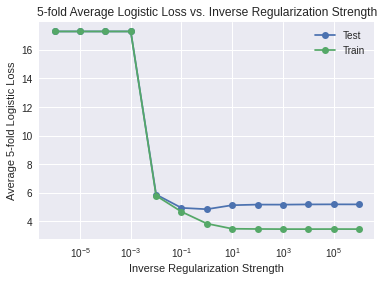

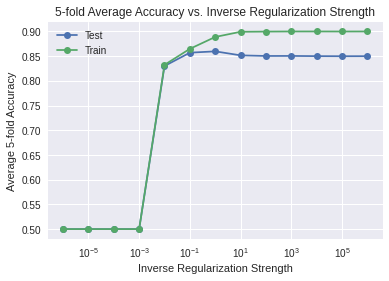

In [ ]:
regularization_kfolds(x_train, y_train, penalty='l1')

The average accuracy on the test folds is 86%. Not too bad! As expected we start to see divergence between performance on the training folds and test folds as overfitting begins to take place.

We now look at some of the misclassifications of the optimal lasso model in detail and create a confusion matrix and heat map of the pixel weights to get a sense of what it deems important pixels. We will use this information to inform what may be good features to add to the model and improve perfomance.

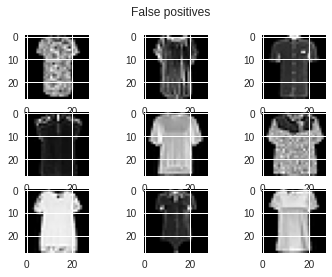

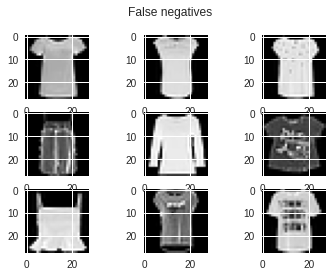

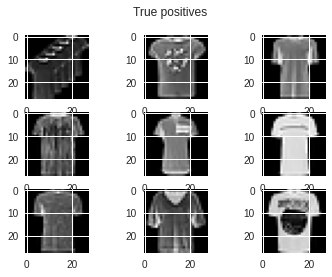

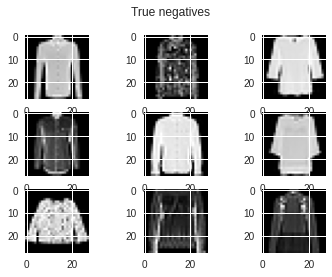

In [ ]:
logistic_base = sklearn.linear_model.LogisticRegression(C=.1, solver='liblinear', penalty='l1')
logistic_base.fit(x_train, y_train)
preds_base = logistic_base.predict(x_train)
display_misclass(x_train, y_train, preds_base)

In [ ]:
cm = sklearn.metrics.confusion_matrix(y_train, preds_base)
cm_df = pd.DataFrame(cm, columns=[0,1], index=[0,1])
cm_df.columns.name = 'Predicted'
cm_df.index.name = 'Truth'
print(cm_df)

Predicted     0     1
Truth                
0          5057   943
1           665  5335


Like with the digits, take a look at the heat map of coefficients

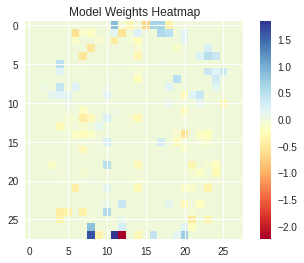

In [ ]:
weights = np.reshape(logistic_base.coef_, (28,28))
plt.imshow(weights, cmap='RdYlBu')
plt.colorbar()
plt.title('Model Weights Heatmap');

It is understandable that the model has difficulty with some of the images from the false positive and false negative classes since some of the t-shirts look like a pullover or ordinary shirt and vice-versa. From the heatmap, we see a blue (indicating higher coefficient weights and t-shirt probability) outline and a yellow (indicating lower coefficient weights and t-shirt probability) outline. The blue outline is slightly wider at the top where we might expect the sleeves of a t-shirt to be. The yellow outline is wider at the bottom where we might expect the sleeves of an ordinary shirt to be. There are also yellow pixels down the middle, possibly indicating buttons or an opening in a formal shirt. Oddly enough, there are two pixels at the bottom of the image that the model considers important but for opposite classifications. The outline, shape, and edges are characteristics that seem to be important, so we explore features that emphasize these.

## Edge Pixel Map Model

The first feature transformation consists of creating an image that emphasizes edges in the original image. A few different edge detection methods were explored here, all variants of the **Sobel operator** in image processing, which is a discrete differential operator. In order to capture vertical edges, a difference in neighboring horizontal pixel values was calculated for every pixel in the image. In order to capture horizontal edges, a difference in vertical pixel values was calculated for every pixel in the image. Two more edge detection methods were tested as features: averaging neighbor pixel value differences and the maximum neighbor pixel value difference.

Below we define a function that creates these edge pixel images and looks at an example of the function applied to an image of a t-shirt.

In [ ]:
def image_diff(image, diff_type):
    image_height = 28
    image_width = 28
    
    image = np.reshape(image, (image_height, image_width))
    diff_image = np.zeros((image_height, image_width))
    
    # pad the image to make the difference and averaging process easier
    image = np.concatenate((image, np.zeros((1,28))))
    image = np.concatenate((np.zeros((1,28)), image))
    image = np.concatenate((image, np.zeros((30, 1))), axis=1)
    image = np.concatenate((np.zeros((30, 1)), image), axis=1)
    
    pad_image_height = 30
    pad_image_width = 30
    
    # now iterate over the original image dimensions
    if diff_type == 'x':
        for i in range(image_height):
            for j in range(image_width):
                diff_image[i,j] = abs(image[i,j+1]-image[i,j])
    elif diff_type == 'y':
        for i in range(image_height):
            for j in range(image_width):
                diff_image[i,j] = abs(image[i+1,j]-image[i,j])
    elif diff_type == 'avg':
        for i in range(image_height):
            for j in range(image_width):
                surr_diffs = [image[i+1,j]-image[i,j], image[i,j]-image[i-1,j], \
                              image[i,j+1]-image[i,j], image[i,j]-image[i,j-1], \
                              image[i+1,j+1]-image[i,j], image[i,j]-image[i-1,j-1], \
                              image[i+1,j-1]-image[i,j], image[i,j]-image[i-1,j+1]]
                diff_image[i,j] = abs(np.mean(surr_diffs))
    elif diff_type == 'max':
        for i in range(image_height):
            for j in range(image_width):
                surr_diffs = [image[i+1,j]-image[i,j], image[i,j]-image[i-1,j], \
                              image[i,j+1]-image[i,j], image[i,j]-image[i,j-1], \
                              image[i+1,j+1]-image[i,j], image[i,j]-image[i-1,j-1], \
                              image[i+1,j-1]-image[i,j], image[i,j]-image[i-1,j+1]]
                diff_image[i,j] = abs(np.max(surr_diffs))

    return diff_image

Now create the new edge features to be added to the model and look at an example image

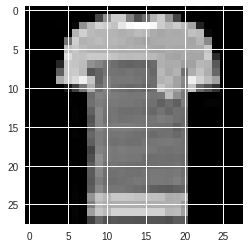

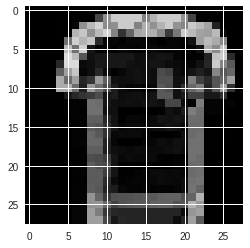

In [ ]:
num_images = np.shape(x_train)[0]
num_pixel = np.shape(x_train)[1]

x_train_edge = np.zeros((num_images, num_pixel))
for i in range(num_images):
    x_train_edge[i, :] = np.ravel(image_diff(x_train[i, :], 'max'))

plt.figure()
plt.imshow(np.reshape(x_train[1, :], (28,28)), cmap='gray', vmin=0, vmax=1);
plt.figure()
plt.imshow(np.reshape(x_train_edge[1, :], (28,28)), cmap='gray', vmin=0, vmax=1);

Create the model using these additonal edge pixels as features. We will do 5-fold cross-validation to tune the regularization hyperparameter and determine the optimal amount of regularization

In [ ]:
x_train_with_edge = np.concatenate((x_train, x_train_edge), axis=1)

Finished C=1e-06 loop
Finished C=1e-05 loop
Finished C=0.0001 loop
Finished C=0.001 loop
Finished C=0.01 loop
Finished C=0.1 loop
Finished C=1.0 loop
Finished C=10.0 loop
Finished C=100.0 loop
Finished C=1000.0 loop
Finished C=10000.0 loop
Finished C=100000.0 loop
Finished C=1000000.0 loop

The value of the regularization parameter that minimizes the average logistic loss on test folds is: 0.1

The corresponding maximum average accuracy on test folds is: 0.87

The corresponding minimum average logistic loss on test folds is: 4.47



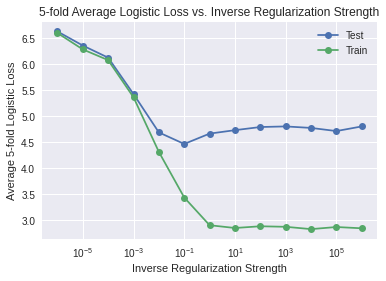

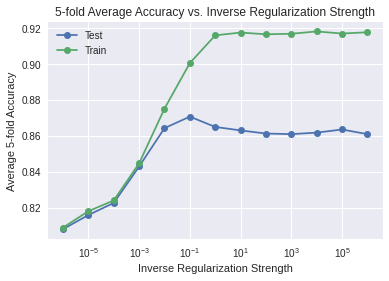

In [ ]:
regularization_kfolds(x_train_with_edge, y_train)

In [ ]:
logistic_with_edge = sklearn.linear_model.LogisticRegression(C=.1, solver='liblinear', penalty='l1')
logistic_with_edge.fit(x_train_with_edge, y_train)
preds_with_edge = logistic_with_edge.predict(x_train_with_edge)

# print a confusion matrix
cm = sklearn.metrics.confusion_matrix(y_train, preds_with_edge)
cm_df = pd.DataFrame(cm, columns=[0,1], index=[0,1])
cm_df.columns.name = 'Predicted'
cm_df.index.name = 'Truth'
print(cm_df)

Predicted     0     1
Truth                
0          5145   855
1           626  5374


This model does slightly better than the previous model, bumping the average accuracy on the test folds up to 87% and reducing the false postives and false negatives by approximately 100. This is a move in the right direction, but hopefully we can find a set of features to boost performance.

We will now look at another set of features to add to the model.

### Black-and-White Pixel Map Model

The second feature transformation consists of turning all the non-black pixels white. This has the effect of eliminating patterns on the interior of the clothing while retaining outline and shape information. The idea here is that the patterns and designs on the interior of the clothing shouldn't be informative to the classfication and perhaps damage performance. Whereas, the outline of the clothing should be enough to classify and should be emphasized. This black-and-white transformation will capture this. Below is an example of an original image and its transformation, as well as the average 5-fold cross-validation performance using the $l_1$ penalty when adding the black-and-white pixel map as an additional set of features.

In [ ]:
def all_white(image):
    image_white = np.zeros((1,28*28))
    for i in range(num_pixel):
        if image[i] > 0:
            image_white[0][i] = 1
    return image_white

In [ ]:
x_train_white = np.zeros((num_images, num_pixel))

for i in range(num_images):
    x_train_white[i, :] = all_white(x_train[i, :])

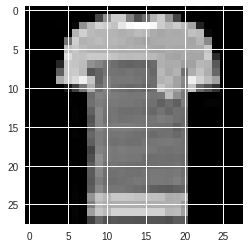

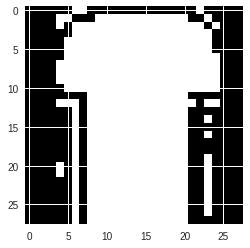

In [ ]:
plt.figure()
plt.imshow(np.reshape(x_train[1, :], (28,28)), cmap='gray', vmin=0, vmax=1);
plt.figure()
plt.imshow(np.reshape(x_train_white[1, :], (28,28)), cmap='gray', vmin=0, vmax=1);

In [ ]:
x_train_with_white = np.concatenate((x_train, x_train_white), axis=1)

Finished C=1e-06 loop
Finished C=1e-05 loop
Finished C=0.0001 loop
Finished C=0.001 loop
Finished C=0.01 loop
Finished C=0.1 loop
Finished C=1.0 loop
Finished C=10.0 loop
Finished C=100.0 loop
Finished C=1000.0 loop
Finished C=10000.0 loop
Finished C=100000.0 loop
Finished C=1000000.0 loop

The value of the regularization parameter that minimizes the average logistic loss on test folds is: 0.1

The corresponding maximum average accuracy on test folds is: 0.86

The corresponding minimum average logistic loss on test folds is: 4.89



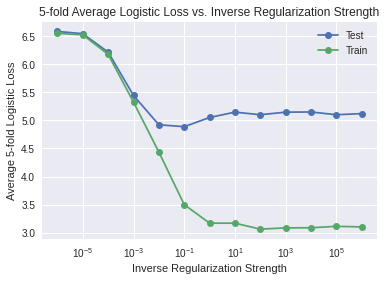

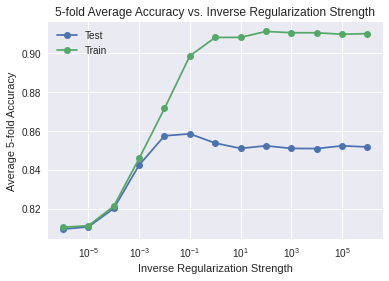

In [ ]:
regularization_kfolds(x_train_with_white, y_train)

In [ ]:
logistic_with_white = sklearn.linear_model.LogisticRegression(C=.1, solver='liblinear', penalty='l1')
logistic_with_white.fit(x_train_with_white, y_train)
preds_with_white = logistic_with_white.predict(x_train_with_white)

cm = sklearn.metrics.confusion_matrix(y_train, preds_with_white)
cm_df = pd.DataFrame(cm, columns=[0,1], index=[0,1])
cm_df.columns.name = 'Predicted'
cm_df.index.name = 'Truth'
print(cm_df)

Predicted     0     1
Truth                
0          5110   890
1           663  5337


This model does not improve the average accuracy on the test folds which remains stable at 86%. There are small reductions in the number of false postives and false negatives. However, since we have doubled the number of features and training the model takes additional time, this black-and-white feature transformation is likely not adding real improvements to the model. This is evidence against the hypothesis that the interior patterns and designs are irrelevant to the classification. Perhaps, information on collars, buttons, and pockets on the interior of the image are important for this problem. This is an interesting avenue to pursue for future work!

### Fourier Transform Pixel Map

The last set of features we will explore are Fourier Transforms of our images. There is a beautiful and rich mathematical theory behind Fourier Transforms. For us, it suffices to think about the images it produces as providing us with a "spatial frequency representation" of our image. Pixels closer to the center represent low spatial frequencies representing larger shapes and outlines in the image. Pixels further from the center represent high spatial frequencies representing finer scale details within the image. Adding this spatial frequency information may be helpful in classifying these images! A nice tutorial on how to interpret the Fourier Transform images can be found here: [Image Transforms](https://homepages.inf.ed.ac.uk/rbf/HIPR2/fourier.htm). Below are two example images of a t-shirt and a blouse and their corresponding Fourier Transform images (technically, the magnitude squared of the Fourier Transform).

In [ ]:
def FT(image):
    image_height = 28
    image_width = 28
    image = np.reshape(image, (image_height, image_width))        
    image_ft = np.fft.fft2(image)

    return np.abs(image_ft)**2

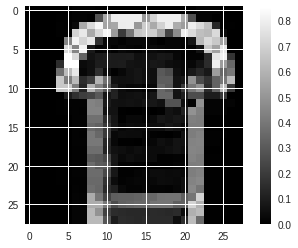

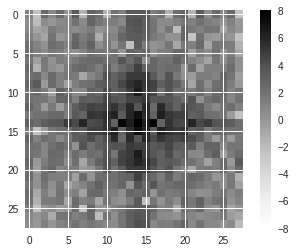

In [ ]:
sample_image = np.reshape(x_train_edge[1, :], (28,28))
image_ft = FT(sample_image)

plt.figure()
plt.imshow(sample_image, cmap='gray');
plt.colorbar();
plt.figure()
plt.imshow(np.log(np.fft.fftshift(image_ft)), vmin=-8, vmax=8);
plt.colorbar();

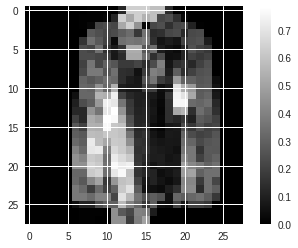

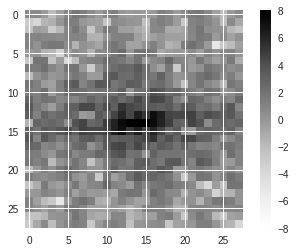

In [ ]:
sample_image = np.reshape(x_train_edge[200, :], (28,28))
image_ft = FT(sample_image)

plt.figure()
plt.imshow(sample_image, cmap='gray');
plt.colorbar();
plt.figure()
plt.imshow(np.log(np.fft.fftshift(image_ft)), vmin=-8, vmax=8);
plt.colorbar();

We will now train the model using these Fourier Transform pixels as features.

In [ ]:
x_train_edge_ft = np.zeros((num_images, num_pixel))

for i in range(num_images):
    x_train_edge_ft[i, :] = np.ravel(FT(x_train_edge_ft[i, :]))

# normalize using MinMaxScaler before training the model
scaler=sklearn.preprocessing.MinMaxScaler()
x_train_edge_ft = scaler.fit_transform(x_train_edge_ft)

In [ ]:
x_train_with_ft = np.concatenate((x_train, x_train_edge, x_train_edge_ft), axis=1)

Finished C=0.01 loop
Finished C=0.06210526315789474 loop
Finished C=0.11421052631578947 loop
Finished C=0.16631578947368422 loop
Finished C=0.21842105263157896 loop
Finished C=0.2705263157894737 loop
Finished C=0.32263157894736844 loop
Finished C=0.37473684210526315 loop
Finished C=0.4268421052631579 loop
Finished C=0.4789473684210527 loop
Finished C=0.5310526315789474 loop
Finished C=0.5831578947368421 loop
Finished C=0.6352631578947369 loop
Finished C=0.6873684210526316 loop
Finished C=0.7394736842105263 loop
Finished C=0.791578947368421 loop
Finished C=0.8436842105263158 loop
Finished C=0.8957894736842106 loop
Finished C=0.9478947368421053 loop
Finished C=1.0 loop

The value of the regularization parameter that minimizes the average logistic loss on test folds is: 0.4268421052631579

The corresponding maximum average accuracy on test folds is: 0.87

The corresponding minimum average logistic loss on test folds is: 4.37



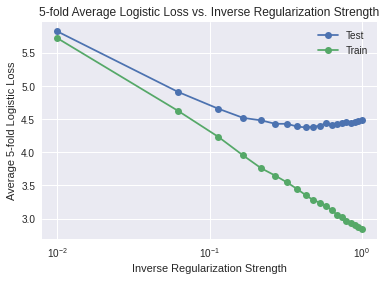

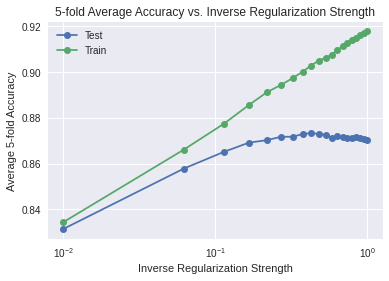

In [ ]:
regularization_kfolds(x_train_with_ft, y_train, penalty='l1', C_grid=np.linspace(.01, 1, 20))

In [ ]:
logistic_ft = sklearn.linear_model.LogisticRegression(C=.42, solver='liblinear', penalty='l1')
logistic_ft.fit(x_train_with_ft, y_train)
preds_with_ft = logistic_ft.predict(x_train_with_ft)

cm = sklearn.metrics.confusion_matrix(y_train, preds_with_ft)
cm_df = pd.DataFrame(cm, columns=[0,1], index=[0,1])
cm_df.columns.name = 'Predicted'
cm_df.index.name = 'Truth'
print(cm_df)

Predicted     0     1
Truth                
0          5318   682
1           504  5496


This model does better than the baseline model with an average test fold accuracy of 88%. The number of false positives and false negatives also went down by approximately 150. On unseen test data this model placed first on the leaderboard for in the Tufts University Machine Learning CS135 in the Summer 2021!

As mentioned previously, state-of-the-art models achieve test accuracy in the low 90's, so we should keep our expectations in check here and not expect the 98% accuracy we achieved previously on the MNIST Digits dataset. This is especially true since we are using a relatively simple logistic regression model and not finely tuned convolutional neural networks.

A common technique that could be applied in the future to help improve the performance of the models would be adding random geometric and hue transformations to the dataset i.e. data augmentation. This has the effect of increasing the amount of data to train on, and reduce the effect of irrelevant features the model may emphasize such as orientation, brightness and chirality. Furthermore, it may be worth investigating different filters applied to the Fourier Transform images such as low-pass and high-pass filters that focus on spatial frequencies within the image. 